<a href="https://colab.research.google.com/github/winfred-mutinda-crypto/winfred/blob/master/Copy_of_DSAIMS2019_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature based classification Prac 2

### Data Analytics - AIMS 2019

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


Credits:

(extended from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

## Task

Before starting with the implementation of a neural network ask yourself these questions:

1) What is a classification problem?

2) What can we expect the outputs values to be?

3) How many inputs would a neural network have if we tried to solve such a problem?

4) How many outputs would a neural network have?

5) What we want the network to output?

6) Which loss function would we use?

7) What would be a good strategy to take when designing the network?

## Imports first

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
%matplotlib inline

%tensorflow_version 1.x

## Load the dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## View the shape

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3)

In [ ]:
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Validation data shape : ', X_val.shape, Y_val.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (42000, 28, 28) (42000,)
Validation data shape :  (18000, 28, 28) (18000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [ ]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 7')

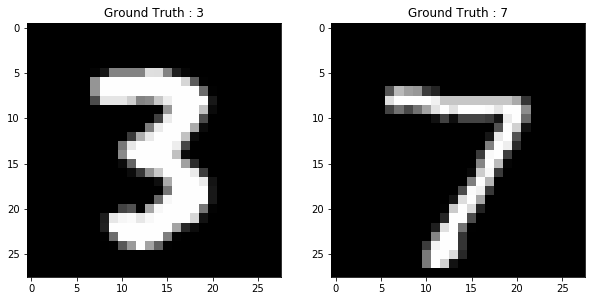

In [ ]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Task

The dataset contains images and 1 target class.

Each image is 28x28 pixels in size.

But a picture is a matrix of values, so we can flatten out the values into a long vector of length 784 (28x28). Thus, there are 784 features.

The different classes are as follows: 1,2,3,4,5,6,7,8,9,0 each representing a class and not a numerical value like in a regression problem.

1) How many inputs would a neural network have if we tried to solve this problem?

2) How many outputs would the neural network have?

3) What is the goal here? What are we trying to achieve with machine learning?

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [ ]:
X_train[0].shape

(784,)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Task: Convert from image shape to a vector shape

We go from 28x28 pixel sized images to a vector of length 784.

We would like to reshape the training data `X_train` from shape (60000, 28, 28) to (60000,784). To do this, we can make use of Numpy's *reshape* function. 

Hint: Below I show you how to do it for `X_train`, you will need to do it for the testing features.

In [ ]:
X_train = np.reshape(X_train, (42000, 784))

In [ ]:
X_train.shape

(42000, 784)

In [ ]:
X_test = np.reshape(X_test, (10000, 784))

In [ ]:
X_test.shape

(10000, 784)

## Now the data is a long vector

There are 60,000 examples for which each is a vector of length 784

In [ ]:
X_train.shape

(42000, 784)

## View the first example

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Task: Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier. To do this, we simply divide by the maximum value, in this case 255. So here you need to divide each split by 255.

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 maps to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 maps to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 maps to [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

Notes on one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Before

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Task: Convert from categorical labels to one-hot encoded vectors

In this case there are 10 classes so we can tell the function to convert into a vector of length 10. You need to convert both the training targets and the testing targets.

In [ ]:
num_classes = 10

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_val = np_utils.to_categorical(Y_val, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

## After

In [ ]:
Y_test[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Check the new shape

In [ ]:
print (Y_train.shape)
print (Y_val.shape)
print (Y_test.shape)

(42000, 10, 10)
(18000, 10, 10)
(10000, 10, 10)


## Task: Create a neural network model

* You will have to define a model
* You can add a number of dense layers
* Remember to specify and intput dimension for the first layer (this is always  the case for the first layer only)
* You will have to compile the model and define a metric

In [ ]:
def baseline_model():

    model = Sequential()

    model.add(Dense(128, input_dim=784, activation='relu'))

    model.add(Dropout(rate = 0.4))

    model.add(Dense(64, activation='relu'))

    model.add(Dropout(rate = 0.4))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

## Task: Initialise the model

In [ ]:
model = baseline_model()



## Task: Determine the number of trainable parameters

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Task: Begin training

Fit on the training features and targets. Also make use of the validation data you've set aside above. Set the number of epochs, batch size and also explore various *verbose* values.

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=10, batch_size=8, verbose=1)

ValueError: ignored

## Predict on one example

In [ ]:
model.predict_classes(np.expand_dims(X_test[0], axis=0))

## Task: Predict on the test data

In [ ]:
predictions = # Your code here

In [ ]:
predictions

## Task: Compute the accuracy

In [ ]:
correct_values = # Your code here

In [ ]:
# Your code here